In [36]:
from keras.preprocessing import image
import numpy as np
import tensorflow_hub as hub
import cv2

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [14, 8]    # incrementar tamaño de plots

In [37]:
def display_color_row(*imgs):
    for i, img in enumerate(imgs):
        print(type(img), img.dtype, img[0,0])
        plt.subplot(1, len(imgs), i + 1)
        plt.imshow(img)
        plt.title(f"{i}")
        plt.xticks([])
        plt.yticks([])

In [57]:
def draw_objects(img, boxes, scores, classes):
    img2 = img.copy()
    
    for bbox, class_id, score in zip(boxes, classes, scores):
        # print(bbox,class_id, score)

        x0 = int(bbox[1])
        y0 = int(bbox[0])
        x1 = int(bbox[3])
        y1 = int(bbox[2])
        # print(x0, y0, x1, y1)
        if score > 0.5:
            cv2.rectangle(
                img2, 
                (x0, y0), 
                (x1, y1), 
                (0, 255, 0), 
                3
            )
            cv2.putText(img2, str(class_id), (x0, y1), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)

    return img2


In [39]:
detector = hub.load("https://tfhub.dev/tensorflow/efficientdet/lite2/detection/1")


In [52]:
img = image.load_img("street.jpg") #, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = x.astype(np.uint8)
print(x.shape)

(1, 866, 1300, 3)


In [46]:
boxes, scores, classes, num_detections = detector(x)
print(boxes.shape)
print(scores.shape)
print(classes.shape)
# print(boxes.shape)

(1, 100, 4)
(1, 100)
(1, 100)


<class 'numpy.ndarray'> uint8 [31 26 22]
<class 'numpy.ndarray'> uint8 [31 26 22]


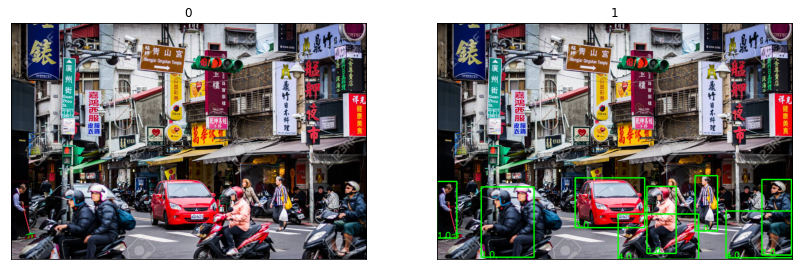

In [58]:
display_color_row(x[0], draw_objects(x[0], boxes[0].numpy(), scores[0].numpy(), classes[0].numpy()))